<a href="https://colab.research.google.com/github/kmouleejunhyuk/bigdata_analysist_practical/blob/main/ADP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import sklearn
import scipy

In [ ]:
rawdata = pd.read_csv('/content/drive/MyDrive/big_2021/data/ADP/모의고사 R코드 및 데이터/모의고사 1회/FIFA.csv', encoding = 'cp949')

In [ ]:
rawdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,16642.0,213846.073849,30546.895337,16.0,199571.25,221497.5,236803.0,246620.0
Age,16642.0,25.225754,4.716345,16.0,21.00,25.0,29.0,45.0
Overall,16642.0,66.162180,7.008032,46.0,62.00,66.0,71.0,94.0
Jersey_Number,16642.0,19.657794,16.055119,1.0,8.00,17.0,26.0,99.0
Contract_Valid_Until,16642.0,2020.241257,1.290654,2018.0,2019.00,2020.0,2021.0,2026.0
Weight_lb,16642.0,165.988162,15.575286,110.0,154.00,165.0,176.0,243.0
Release_Clause,16642.0,4584.939911,11119.040864,13.0,525.00,1100.0,3500.0,228100.0
Value,16642.0,2442.530946,5720.773674,10.0,300.00,675.0,2000.0,118500.0
Wage,16642.0,9.618375,22.264145,1.0,1.00,3.0,8.0,565.0
Height_cm,16642.0,178.393973,6.606026,152.5,172.50,177.5,182.5,202.5


In [ ]:
rawdata.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


#ORIGINAL

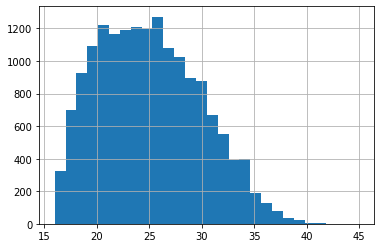

In [ ]:
rawdata['Age'].hist(bins = 28)

AGE와 OVERALL의 correlation과 pvalue

In [ ]:
scipy.stats.pearsonr(rawdata['Age'], rawdata['Overall'])

(0.4649034580646554, 0.0)

In [ ]:
#연관계수 0.46, pvalue 0.0 => 상관계수가 통계적으로 유의

단일표본 t검정

In [ ]:
mean = rawdata['Age'].mean()

In [ ]:
#귀무가설: 모평균과 10% 표본의 평균은 같다 -->기각할 수 없음
s = rawdata['Age'].sample(frac = 0.1)
scipy.stats.ttest_1samp(s, mean)

Ttest_1sampResult(statistic=-0.11098256887466211, pvalue=0.911643561544982)

-0.013013731476434032

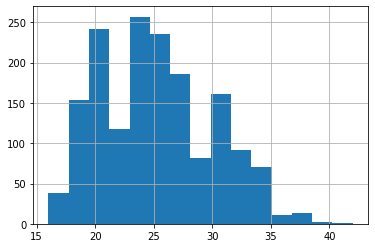

In [ ]:
s.hist(bins = 15)
s.mean() - mean

독립표본 t검정

In [ ]:
#귀무가설: 몸값이 평균 미만인 그룹과 몸값이 평균 이상인 그룹 간 나이의 평균은 같다 --> 기각
first = rawdata.loc[rawdata['Value']<2442, 'Age']

second = rawdata.loc[rawdata['Value']>=2442, 'Age']

scipy.stats.ttest_ind(first, second)

Ttest_indResult(statistic=-16.35809353882334, pvalue=1.1129596813311718e-59)

In [ ]:
#chi2_contingency, binom_test, zscore, kruskal 등 추가

#ADP

height변수의 단위를 cm으로 변환하여 새로운 변수 height_cm을 생성하시오
(height: ft'inch, 1ft = 30cm, 1inch = 2.5cm)


In [ ]:
rawdata['Height_cm'] = [int(x.split("'")[0]) * 30 + int(x.split("'")[1]) * 2.5 for x in rawdata['Height']]

In [ ]:
rawdata['Height_cm'].head()

0    167.5
1    185.0
2    172.5
3    190.0
4    177.5
Name: Height_cm, dtype: float64

Position 재범주화

In [ ]:
Fow = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
Mid = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM']
Def = ['LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
Goal = ['GK']

Position_Class = []
for idx, row in rawdata.iterrows():
    position = row['Position']

    if position in Fow:
        Position_Class.append('Foward')
    elif position in Mid:
        Position_Class.append('Midfielder')
    elif position in Def:
        Position_Class.append('Defender')
    elif position in Goal:
        Position_Class.append('GoalKeeper')

rawdata['Position_Class'] = Position_Class

In [ ]:
rawdata

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm,Position_Class
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167.5,Foward
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185.0,Foward
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172.5,Foward
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190.0,GoalKeeper
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,177.5,Midfielder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16637,238813,J. Lundstram,19,England,47,Crewe Alexandra,Right,Medium/ Medium,CM,22,2019,5'9,134,143,60,1,172.5,Midfielder
16638,243165,N. Christoffersson,19,Sweden,47,Trelleborgs FF,Right,Medium/ Medium,ST,21,2020,6'3,170,113,60,1,187.5,Foward
16639,241638,B. Worman,16,England,47,Cambridge United,Right,Medium/ Medium,ST,33,2021,5'8,148,165,60,1,170.0,Foward
16640,246268,D. Walker-Rice,17,England,47,Tranmere Rovers,Right,Medium/ Medium,RW,34,2019,5'10,154,143,60,1,175.0,Foward


Position_Class변수의 각 범주에 따른 Value(시장가치)의 평균 차이를 비교하는 일원배치 분산분석을 수행하고 결과를 해석하시오. 유의하다면 사후검정을 수행하고 설명하시오


In [ ]:
from scipy.stats import f_oneway

alpha = 0.05
stat, pval = f_oneway(rawdata.loc[rawdata['Position_Class'] == 'Foward', 'Value'].values,
                       rawdata.loc[rawdata['Position_Class'] == 'Midfielder', 'Value'].values,
                       rawdata.loc[rawdata['Position_Class'] == 'Defender', 'Value'].values,
                       rawdata.loc[rawdata['Position_Class'] == 'GoalKeeper', 'Value'].values
                       )

if pval < alpha:
    print(f'significant difference shown. diff: {stat}, pval: {pval}')

else:
    print('no significant difference shown')

significant difference shown. diff: 41.87390580849466, pval: 5.988667429906719e-27


Age가 value에 영향을 미치는지 알아보는 회귀분석을 수행하고 결과를 해석하시오


In [ ]:
#단계적선택법은 statsmodel, scipy에서는 힘듬
#다중회귀분석 불가능, age~value만
from scipy.stats import linregress

In [ ]:
x = rawdata[['Age', 'Value']]
#y = rawdata[['Value']]

In [ ]:
x.shape

(16642, 2)

In [ ]:
slope, intercept, r, p, se = linregress(x.values.reshape(-1, 2))

In [ ]:
slope

92.72181809141009

In [ ]:
intercept

103.55316142887887

In [ ]:
r

0.07644211577370887

In [ ]:
p

5.341208556904889e-23

In [ ]:
se

9.37561962414408